In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Function to read data from local .txt files
def read_txt_files(file_paths):
    data = ""
    
    # Combine data from all provided file paths
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                data += file.read()
                data += "\n"  # Separate data from different files
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
        except Exception as e:
            print(f"Error reading file '{file_path}': {e}")
    
    # Parse the combined data
    data_list = data.strip().split("\n")
    data_json = {
        "target": [],
        "question": []
    }
    for d in data_list:
        try:
            if len(d) > 0:
                index = d.index(':')  # Find the position of the colon
                label, question = d[:index], d[index + 1:]
                data_json["target"].append(label.strip())
                data_json["question"].append(question.strip())
        except Exception as e:
            print(f"Error processing line: {d}, Error: {e}")
    
    return data_json

# List of .txt file paths
file_paths = [
    "C:/Users/ghada/DL/data/train_1000.txt",
    "C:/Users/ghada/DL/data/train_2000.txt",
    "C:/Users/ghada/DL/data/train_3000.txt",
    "C:/Users/ghada/DL/data/train_4000.txt",
    "C:/Users/ghada/DL/data/train_5500.txt"
]

# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)


In [3]:
# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)

In [4]:

# Save the DataFrame to a CSV file
csv_filename = "C:/Users/ghada/DL/data/train_data_from_txt.csv"
train_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to C:/Users/ghada/DL/data/train_data_from_txt.csv


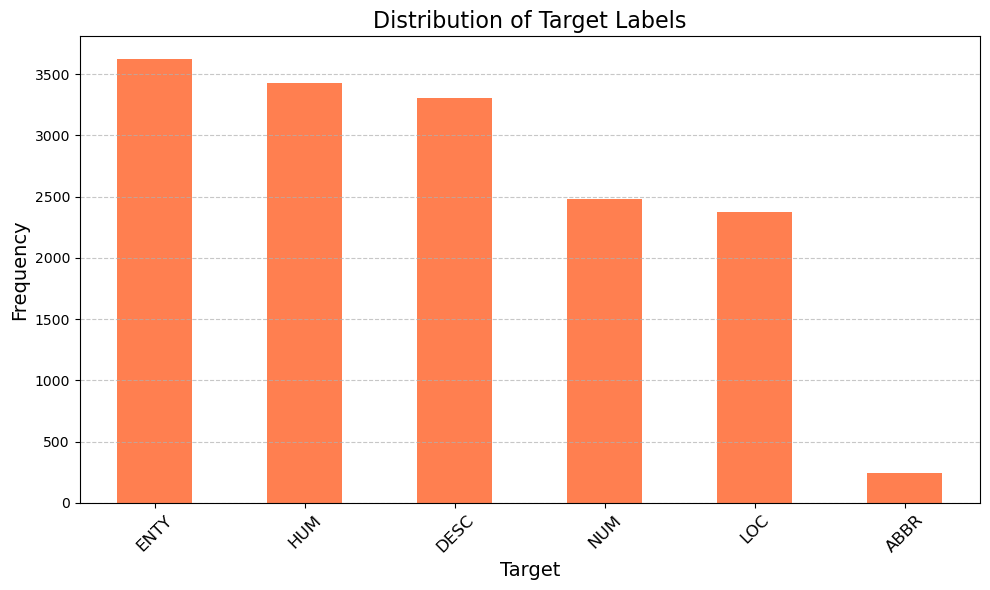

In [5]:
plt.figure(figsize=(10, 6))
train_data["target"].value_counts().plot(kind="bar", color='coral')
plt.title("Distribution of Target Labels", fontsize=16)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

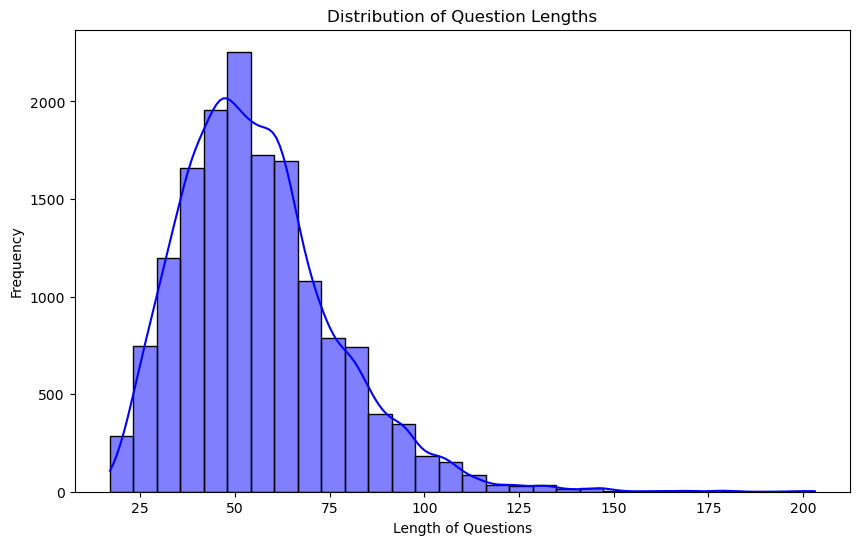

In [6]:
import seaborn as sns
# Visualization 2: Length of Questions
train_data['question_length'] = train_data['question'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['question_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Question Lengths")
plt.xlabel("Length of Questions")
plt.ylabel("Frequency")
plt.show()

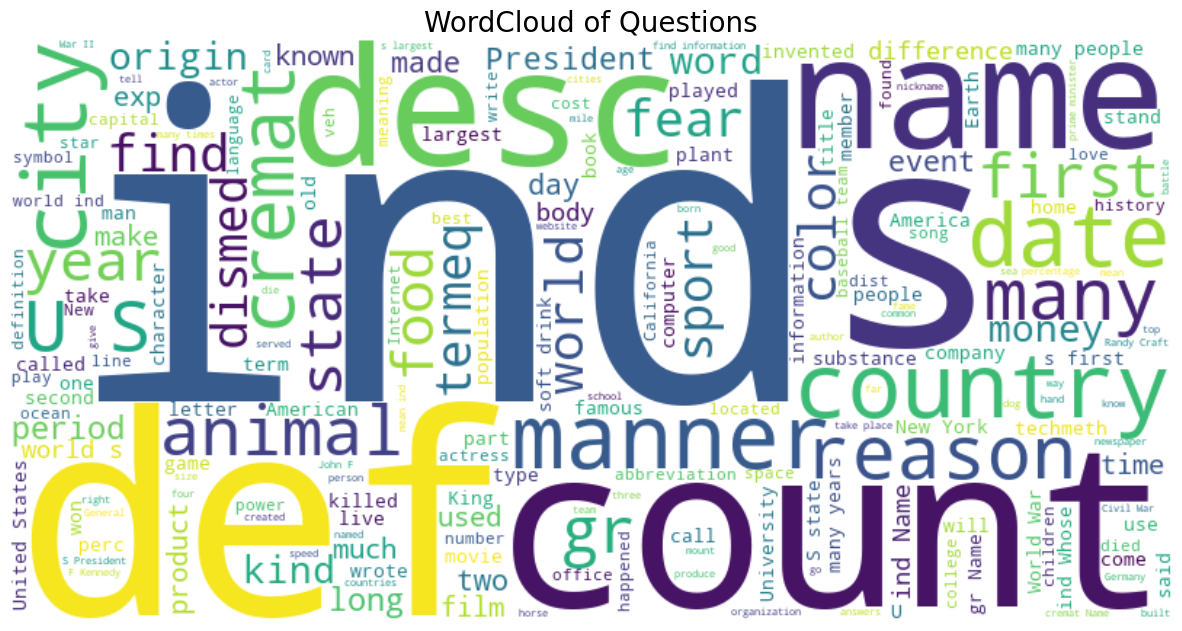

In [7]:
# Visualization 3: Top Words in Questions
from collections import Counter
from wordcloud import WordCloud
# Generate word frequency
all_words = " ".join(train_data['question'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Questions", fontsize=20)
plt.show()

In [8]:
train_data

,target,question,question_length
0,DESC,manner How did serfdom develop in and then lea...,57
1,ENTY,cremat What films featured the character Popey...,55
2,DESC,manner How can I find a list of celebrities ' ...,58
3,ENTY,animal What fowl grabs the spotlight after the...,75
4,ABBR,exp What is the full form of .com ?,35
...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45
15448,ENTY,currency What type of currency is used in China ?,49
15449,NUM,temp What is the temperature today ?,36
15450,NUM,temp What is the temperature for cooking ?,42


In [9]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

train_data['contains_currency_symbol'] = train_data['question'].apply(currency)

In [10]:
train_data.head()

,target,question,question_length,contains_currency_symbol
0,DESC,manner How did serfdom develop in and then lea...,57,0
1,ENTY,cremat What films featured the character Popey...,55,0
2,DESC,manner How can I find a list of celebrities ' ...,58,0
3,ENTY,animal What fowl grabs the spotlight after the...,75,0
4,ABBR,exp What is the full form of .com ?,35,0


In [11]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

train_data['contains_number'] = train_data['question'].apply(numbers)

In [12]:
train_data.head()

,target,question,question_length,contains_currency_symbol,contains_number
0,DESC,manner How did serfdom develop in and then lea...,57,0,0
1,ENTY,cremat What films featured the character Popey...,55,0,0
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0
4,ABBR,exp What is the full form of .com ?,35,0,0


In [13]:
#data cleaning 
import re

# Define text-cleaning functions
def pre_process(raw_sentence):
    return re.sub(r"[^a-zA-Z0-9\s\'?!,.]", r"", raw_sentence)

def remove_extra_spaces(raw_sentence):
    return re.sub(r"\s\s+", r" ", raw_sentence)

def remove_space_before_apost(raw_sentence):
    return re.sub(r"\s'", r"'", raw_sentence)

def remove_endline_char(raw_sentence):
    return re.sub(r"\n", r"", raw_sentence)

def clean_sentence(sentence):
    sentence = pre_process(sentence)
    sentence = remove_extra_spaces(sentence)
    sentence = remove_space_before_apost(sentence)
    sentence = remove_endline_char(sentence)
    return sentence

# Apply the cleaning functions to the `question` column
train_data['cleaned_question'] = train_data['question'].apply(clean_sentence)

In [14]:
train_data[['question', 'cleaned_question']]

,question,cleaned_question
0,manner How did serfdom develop in and then lea...,manner How did serfdom develop in and then lea...
1,cremat What films featured the character Popey...,cremat What films featured the character Popey...
2,manner How can I find a list of celebrities ' ...,manner How can I find a list of celebrities' r...
3,animal What fowl grabs the spotlight after the...,animal What fowl grabs the spotlight after the...
4,exp What is the full form of .com ?,exp What is the full form of .com ?
...,...,...
15447,other What 's the shape of a camel 's spine ?,other What's the shape of a camel's spine ?
15448,currency What type of currency is used in China ?,currency What type of currency is used in China ?
15449,temp What is the temperature today ?,temp What is the temperature today ?
15450,temp What is the temperature for cooking ?,temp What is the temperature for cooking ?


In [15]:
train_data

,target,question,question_length,contains_currency_symbol,contains_number,cleaned_question
0,DESC,manner How did serfdom develop in and then lea...,57,0,0,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...,55,0,0,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0,manner How can I find a list of celebrities' r...
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?,35,0,0,exp What is the full form of .com ?
...,...,...,...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45,0,0,other What's the shape of a camel's spine ?
15448,ENTY,currency What type of currency is used in China ?,49,0,0,currency What type of currency is used in China ?
15449,NUM,temp What is the temperature today ?,36,0,0,temp What is the temperature today ?
15450,NUM,temp What is the temperature for cooking ?,42,0,0,temp What is the temperature for cooking ?


In [16]:

# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:

# Cleaning the questions
corpus = []
wnl = WordNetLemmatizer()

for QC_string in list(train_data.question):

  # Cleaning special character from the sms
  question = re.sub(pattern='[^a-zA-Z]', repl=' ', string=QC_string)

  # Converting the entire sms into lower case
  question = question.lower()

  # Tokenizing the question by words
  words = question.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  question = ' '.join(lemmatized_words)

  # Building a corpus of questions
  corpus.append(question)

In [18]:
train_data

,target,question,question_length,contains_currency_symbol,contains_number,cleaned_question
0,DESC,manner How did serfdom develop in and then lea...,57,0,0,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...,55,0,0,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...,58,0,0,manner How can I find a list of celebrities' r...
3,ENTY,animal What fowl grabs the spotlight after the...,75,0,0,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?,35,0,0,exp What is the full form of .com ?
...,...,...,...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45,0,0,other What's the shape of a camel's spine ?
15448,ENTY,currency What type of currency is used in China ?,49,0,0,currency What type of currency is used in China ?
15449,NUM,temp What is the temperature today ?,36,0,0,temp What is the temperature today ?
15450,NUM,temp What is the temperature for cooking ?,42,0,0,temp What is the temperature for cooking ?


In [19]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [20]:
# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = train_data['target']

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(train_data['target'])

In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
vocab_size = 5000  # Taille maximale du vocabulaire
embedding_dim = 128  # Dimension des embeddings
max_length = 100  # Longueur maximale des séquences
test_size = 0.2  # Fraction des données pour le test
batch_size = 32
epochs = 10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Création du modèle CNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))  # Embedding layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Convolutional layer
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(64, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(len(np.unique(train_data['target'])), activation='softmax'))  # Output layer


In [27]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.2429 - loss: 1.6843 - val_accuracy: 0.2782 - val_loss: 1.6298
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2687 - loss: 1.6443 - val_accuracy: 0.2782 - val_loss: 1.6321
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.2659 - loss: 1.6399 - val_accuracy: 0.2627 - val_loss: 1.6301
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.2632 - loss: 1.6360 - val_accuracy: 0.2782 - val_loss: 1.6275
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.2618 - loss: 1.6334 - val_accuracy: 0.2782 - val_loss: 1.6267
Epoch 6/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.2680 - loss: 1.6356 - val_accuracy: 0.2782 - val_loss: 1.6264
Epoch 7/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.2712 - loss: 1.6360 - val_accuracy: 0.2782 - val_loss: 1.6256
Epoch 8/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.2681 - loss: 1

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2651 - loss: 1.6275
Test accuracy: 0.2785506248474121


In [30]:
def preprocess_input_text(text, tokenizer, max_length):
    """
    Preprocess a single input text, tokenize, and pad it.
    """
    # Preprocess the text
    text = preprocess_text(text)
    # Tokenize the text
    sequence = tokenizer.texts_to_sequences([text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    return padded_sequence

def predict_category(text, model, tokenizer, max_length, label_encoder):
    """
    Predict the category of a given text using the trained model.
    """
    # Preprocess the input text
    padded_sequence = preprocess_input_text(text, tokenizer, max_length)
    # Predict the category probabilities
    predictions = model.predict(padded_sequence)
    # Get the category index with the highest probability
    predicted_index = np.argmax(predictions, axis=1)[0]
    # Convert the index back to the category label
    predicted_category = label_encoder.inverse_transform([predicted_index])[0]
    return predicted_category

In [31]:
test_questions = [
    "What is the capital of France?", 
    "Who is the president of the United States?",
    "Why do we need oxygen to survive?", 
    "Where is the Eiffel Tower located?",  
    "How can I learn Python programming?" 
]

In [33]:
# Example questions to test the prediction function
sample_questions = [
    "What is the capital of France?",
    "How do I install Python on Windows?",
    "Who won the 2020 Olympics?",
    "Explain the theory of relativity."
]

print("Sample Predictions:")
for question in sample_questions:
    predicted_category = predict_category(question, model, tokenizer, max_length, label_encoder)
    print(f"Question: {question}")
    print(f"Predicted Category: {predicted_category}")
    print("-" * 50)

Sample Predictions:


NameError: name 'tokenizer' is not defined